# Titanic Survival Prediction

Overview
The data has been split into two groups:

training set (train.csv)

test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Machine Learning Implemetation

As the output 'Survived' is binary data with 0 for 'No' and 1 for 'Yes', we will use logistic regression as our baseline model and later test the data on SVM, Decision tree, Random Forest and XGBoost under supervised learning.

Further we shall aslo attempt unsupervised learning model K means clustering by ignoring the Output column while training and later using it to compare the accuracy of the predictions

In [1]:
# importing required libraries.
# numpy and pandas for handling dataset..
# matplotlib.pyplot and seaborn for plotting.
# We will import only certain modules of sklearn as and when required.
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline 
# for inline data visualization

In [2]:
# supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading training dataset
titanic = pd.read_csv("train.csv")

# Understanding data and Preparation for Data Analysis and model preparation

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info() #The data set is quite small.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# getting null values
ls = [] 
for i in titanic.columns:
    if titanic[i].isnull().sum() > 0:
        ls.append([i, titanic[i].isnull().sum()])
print(ls)

[['Age', 177], ['Cabin', 687], ['Embarked', 2]]


In [8]:
# getting Percentage Null values and their datatype
for i in ls:
    nullpercent = i[1]/titanic.shape[0]
    nullpercent = round(nullpercent,6)
    dt = type(titanic[i[0]][1])
    print(f'Null percentage in {i[0]} is {nullpercent * 100} % and datatype {dt}')

Null percentage in Age is 19.8653 % and datatype <class 'numpy.float64'>
Null percentage in Cabin is 77.1044 % and datatype <class 'str'>
Null percentage in Embarked is 0.2245 % and datatype <class 'str'>


Null treatment

There are only a few null values in Embarked so we will fill them with mode of the column.

There are 19.86% null values in Age so median values would be appropriate for filling the null values.

There are severely high null valued in Cabin. This causes the column to lose in importance for predictive purpose. It would be appropraite to just drop it.


In [9]:
# we dont need PasengerId, Name and Ticket so we will drop them too. 
d = ['PassengerId','Ticket','Cabin','Name']
titanic.drop(d, axis = 1, inplace = True)

In [10]:
#filling Null values using pandas.fillna()
# Note: titanic.Embarked.mode() returns pandas series so use titanic.Embarked.mode()[0] for proper results
titanic.Age.fillna(titanic.Age.median(), inplace = True)
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace = True)

In [11]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
titanic.describe() # statistical overview of Numerical Columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Analysing Data for better Understanding

In [13]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
sns.color_palette("icefire", as_cmap=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

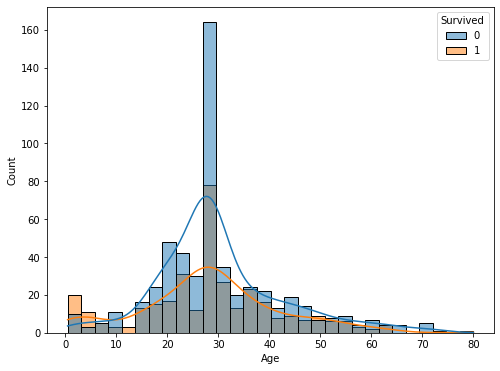

In [15]:
# Histogram of continuous numerical data with Survive as hue
fig = plt.figure(figsize = (8,6))
sns.histplot(x = 'Age', data = titanic, hue = 'Survived', kde = True)

Inference: The Ages of passengers are normally distributed in the range 0 to 80 wit little right skew. Most of Passengers didnt survive in any age group, this trend however not reflected in mkids as Survival among kids( Age 0 to 10) appers higher for their sample population.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

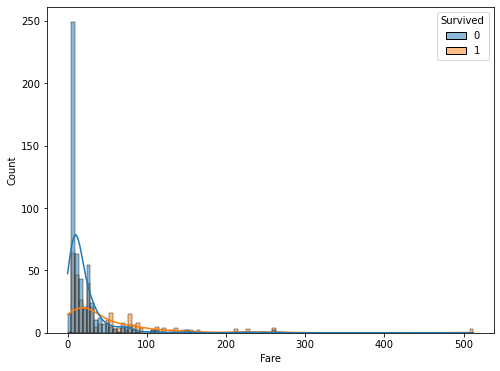

In [16]:
fig = plt.figure(figsize = (8,6))
sns.histplot(x = 'Fare', data = titanic, hue = 'Survived', kde = True)

The data has extreme right skewness with visible outliers. These outliers will severely affect K- means Clustering. We won't drop outliers as of now.

A huge number of people have fares less than 100 pounds.

We can see for lower fares the Survival number is less however, number of survivors are greater than deceased as the fare prices are increased.

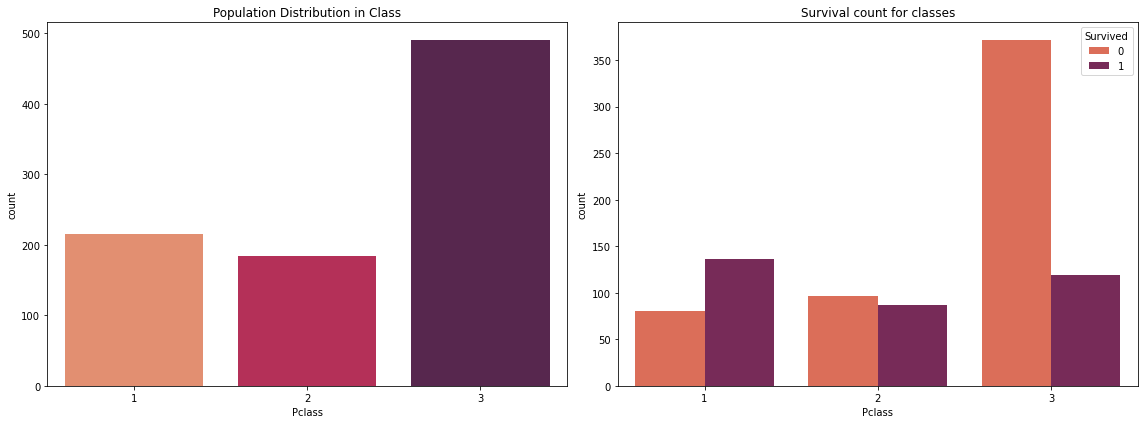

In [17]:
#Lets see the frequency of survivors based on their class
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Population Distribution in Class')
sns.countplot(x='Pclass', data=titanic, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Survival count for classes')
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

The distribution gives the same inference as the histplot of fares.

Pclass shows Socio economic status of passengers. The number of passengers in lower class is more than the sum of people of other classes.

Higher class people (Belonging to First and Second Class), have higher survival rate as compared to lower class. The class distribution is directly proportional to the fares they are charged.

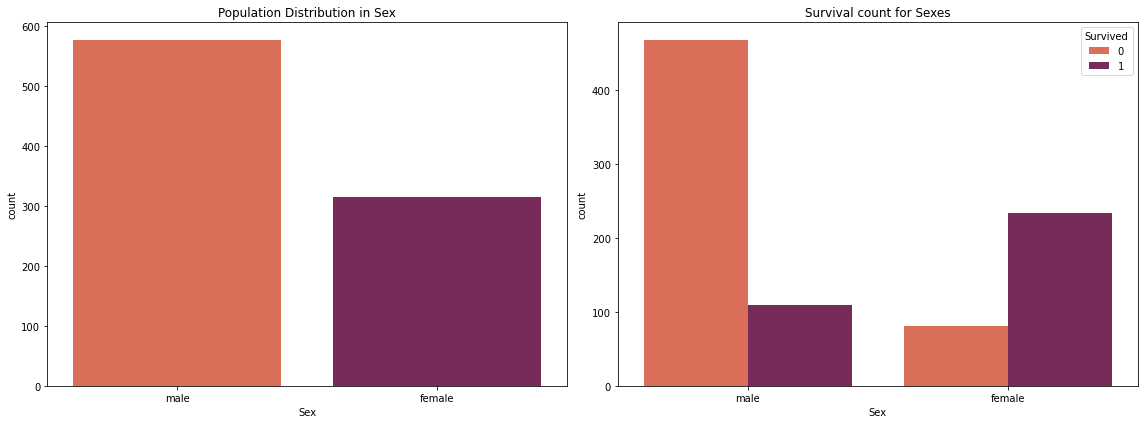

In [18]:
#Lets see the frequency of survivors based on their sex
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Population Distribution in Sex')
sns.countplot(x='Sex', data=titanic, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Survival count for Sexes')
sns.countplot(x='Sex', hue='Survived', data=titanic, palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

There were almost double male passengers as female passengers. 
The Survival data shows higher Survival rate among women compared to men. Around 1/6 of male passengers survived while survival among female passengers is around 1/3 of the total femal population.

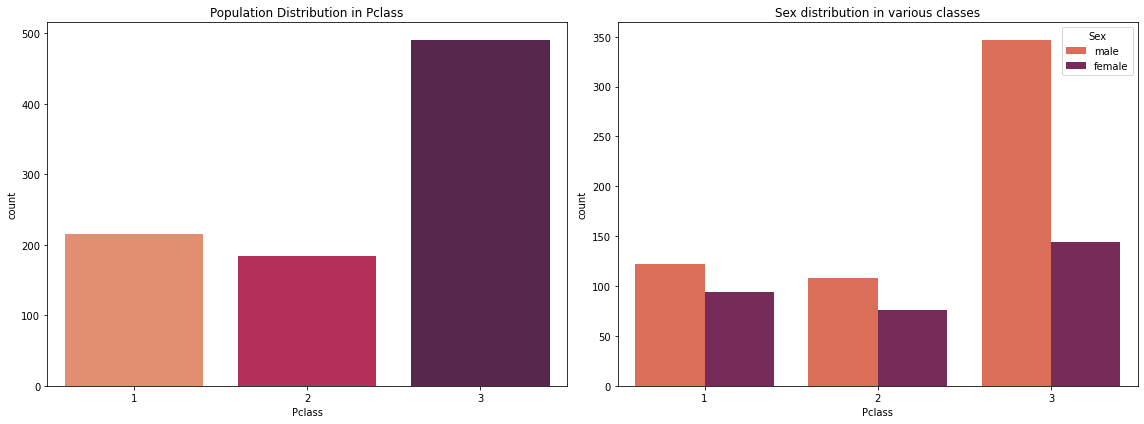

In [19]:
#Lets see sex distribution in varoius pclass
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Population Distribution in Pclass')
sns.countplot(x='Pclass', data=titanic, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Sex distribution in various classes')
sns.countplot(x='Pclass', hue='Sex', data=titanic, palette = 'rocket_r', ax = axs[1])
plt.tight_layout()

Male population is high in all classes with very high number of male population in third class.

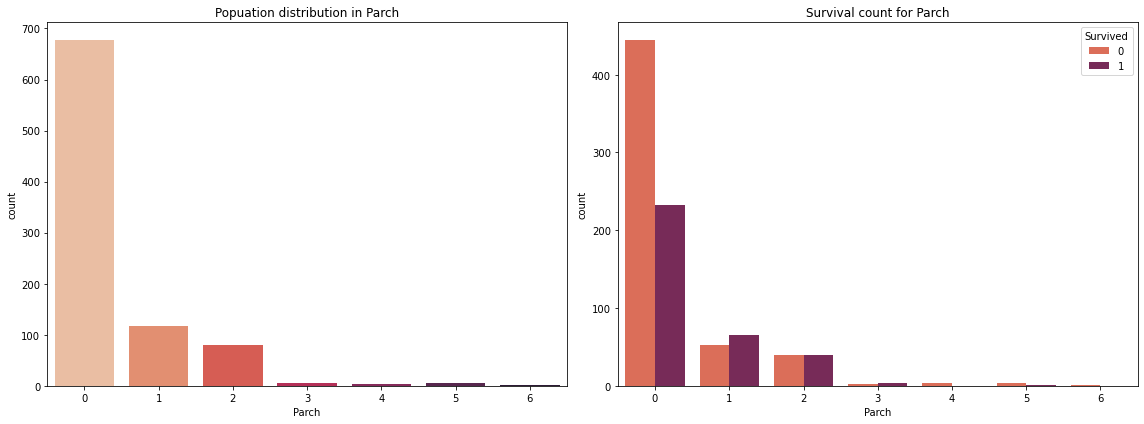

In [20]:
#Lets see the frequency of survivors based on number of related co_passengers defined in Parch column

fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Popuation distribution in Parch')
sns.countplot(x='Parch', data=titanic, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Survival count for Parch')
sns.countplot(x='Parch', hue='Survived', data=titanic, palette = 'rocket_r', ax = axs[1])
plt.legend(title = "Survived", loc=1)
plt.tight_layout()

It shows most of the passengers were either alone or children wit nannies. They also have low survival rate as compared to people with either 1 or 2 related co-passengers. People with 3 or above number of related co-passenges are very few in number

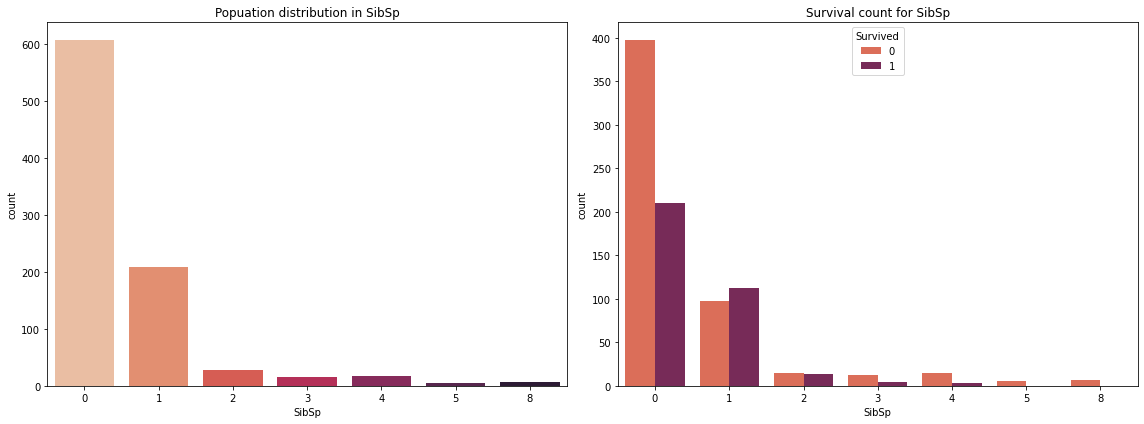

In [21]:
#Lets see the frequency of survivors based on number of related co_passengers defined in SibSp column
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Popuation distribution in SibSp')
sns.countplot(x='SibSp', data=titanic, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Survival count for SibSp')
sns.countplot(x='SibSp', hue='Survived', data=titanic, palette = 'rocket_r', ax = axs[1])
#plt.legend(loc=1)
plt.tight_layout()

It shows most of the passengers were travelling alone. They also have low survival rate as compared to people with 1 related co-passenger. People with 2 or above number of related co-passenges are very few in number.

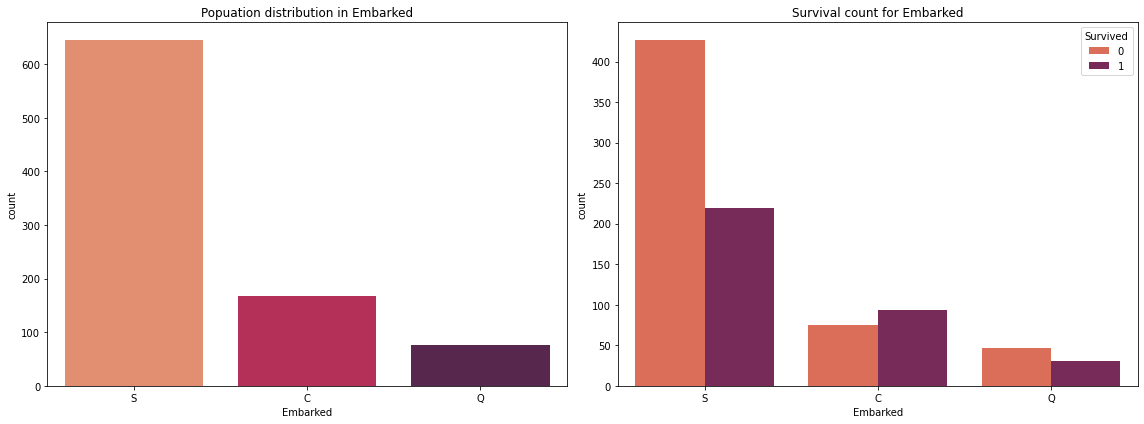

In [22]:
#Lets see the frequency of survivors based on place of embarkment.
fig, axs = plt.subplots(1,2, figsize = (16,6))
axs[0].set_title('Popuation distribution in Embarked')
sns.countplot(x='Embarked', data=titanic, palette = 'rocket_r', ax = axs[0])
axs[1].set_title('Survival count for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=titanic, palette = 'rocket_r', ax = axs[1])
#plt.legend(loc=1)
plt.tight_layout()

S - South Hampton   C - Cherbourgh     Q - Queenstown
Clearly majority of people borded from South Hampton. They however have less survival rate than those boarded from Cherbourgh and Queenstown.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

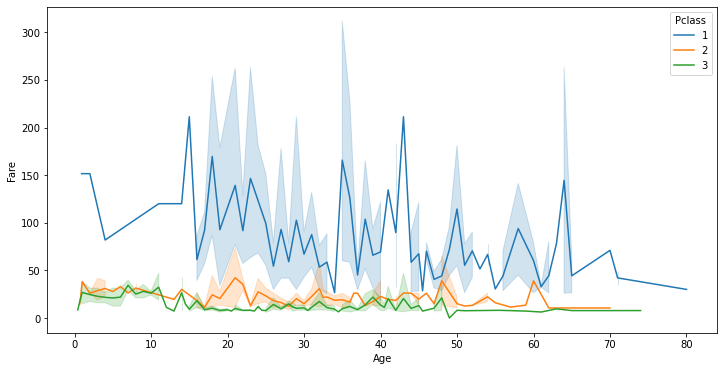

In [23]:
# Lets see the relationship between Pclass, Age and fare
fig = plt.figure(figsize = (12,6))
sns.lineplot(x = 'Age', y = 'Fare',hue = 'Pclass', data = titanic, palette = 'tab10')

Obviously the Higher Class is charged more.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

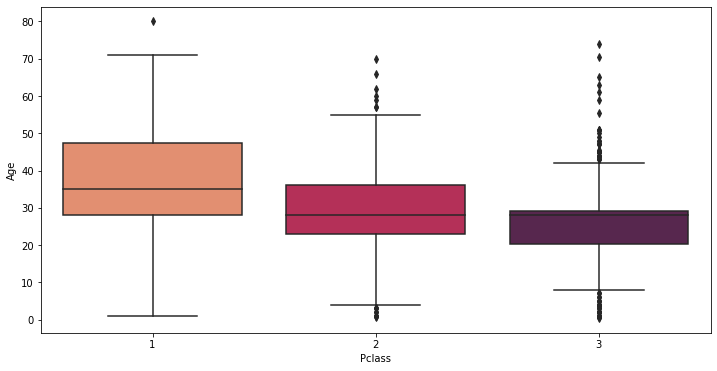

In [24]:
fig = plt.figure(figsize = (12,6))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic, palette = "rocket_r")

The IQR of First class lies around 30 to 50 and have minimal outliers, whereas great dela of outliers are prea=sent in third class and some in second class. Since the dataset is small we wont drop out outliers.


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

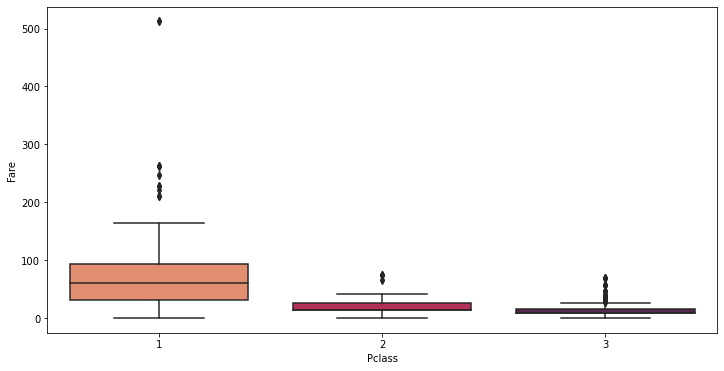

In [25]:
fig = plt.figure(figsize = (12,6))
sns.boxplot(x = 'Pclass', y = 'Fare', data = titanic, palette = "rocket_r")

First class has a wider IQR for this data whereas second class and third class have quite narrow IQR. Outliers are present in all classes, first class however has few extreme outliers.

# Data Preparation

In [26]:
# treationg categorical variables
final_titanic = pd.get_dummies(titanic, drop_first = False)

In [27]:
final_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [28]:
#Scaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = list(final_titanic.columns)
final_titanic[cols] = scaler.fit_transform(final_titanic[cols])
final_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0


# Making of ML model

In [29]:
#Checking null accuracy
na = titanic[titanic.Survived == 0].shape[0]/titanic.shape[0]
na = round(na,6)
print(f'Null Accuracy for the data is {na * 100} %')

Null Accuracy for the data is 61.6162 %


In [30]:
# splitting The data into testing and training sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(final_titanic, train_size = 0.8, test_size = 0.2, random_state = 42)

In [31]:
input_attrib = [x for x in final_titanic.columns if x not in ['Survived']]
ytrain = df_train.Survived
xtrain = df_train[input_attrib]
ytest = df_test.Survived
xtest = df_test[input_attrib]

In [32]:
# Model analysis modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [33]:
# Function For analysing model
def analyse(model, x_data, y_data, data_title):
    pred = model.predict(x_data)
    cm = confusion_matrix(y_data, pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    print(f'For {data_title} data')
    Accuracy  = (accuracy_score(y_data, pred))
    Precision  = (TP/(TP+FP))  
    Sensitivity =(TP/(TP+FN))
    Specificity = (TN/(TN+FP))
    F1 = 2*(TP/(TP+FN)*(TP/(TP+FP))/((TP/(TP+FP))+(TP/(TP+FN))))
    mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
    
    print('Correct Predictions:' ,TP+TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    print('Accuracy:',Accuracy)
    print('Precision:',Precision)
    print('Sensitivity:',Sensitivity)
    print('Specificity:',Specificity)
    print('F1:', F1)
    
    
    mat = pd.DataFrame(cm, index=[ 'Actual Negative','Actual Positive'], 
                                 columns=[ 'Predict Negative','Predict Positive'])
    y_pred = model.predict_proba(x_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_data, y_pred)
    print('ROC AUC score' ,roc_auc_score(y_data, y_pred))
    
    
    fig, axs = plt.subplots(1,2, figsize = (14,5))
    axs[0].set_title('Confusion Matrix')
    sns.heatmap(mat, annot = True, fmt = 'd', ax = axs[0])
    axs[1].set_title('Roc Auc Curve')
    sns.lineplot([0,1], [0,1], ax = axs[1], palette = 'rocket_r')
    sns.lineplot(fpr, tpr, ax = axs[1], palette = 'rocket_r' )
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    plt.tight_layout()

In [34]:
# Feature importance scoring
import xgboost
import xgboost as xgb
from sklearn import metrics
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
def modelfit(alg, x, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if type(alg) == xgboost.sklearn.XGBClassifier:
        if useTrainCV:
            xgb_param = alg.get_xgb_params()
            xgtrain = xgb.DMatrix(x.values, label=y.values)
            cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds, metrics='auc', early_stopping_rounds=early_stopping_rounds)
            print(cvresult)
            alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(x, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x)
    dtrain_predprob = alg.predict_proba(x)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print( "Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    
    
    if type(alg) == sklearn.linear_model._logistic.LogisticRegression:
        # get importance
        importance = alg.coef_[0]
        feat_imp=pd.DataFrame({
        'columns':x.columns,
        'importance':importance})
        feat_imp.sort_values(by='importance', ascending=False)
        # plot feature importance
        plt.figure(figsize = (20,10))
        sns.barplot(x = 'columns', y = 'importance', data = feat_imp)
        plt.xticks(rotation=90)
    
    if type(alg) == sklearn.linear_model._base.LinearRegression:
        # get importance
        importance = alg.coef_
        feat_imp=pd.DataFrame({
        'columns':x.columns,
        'importance':importance})
        feat_imp.sort_values(by='importance', ascending=False)
        # plot feature importance
        plt.figure(figsize = (20,10))
        sns.barplot(x = 'columns', y = 'importance', data = feat_imp)
        plt.xticks(rotation=90)
        
    if type(alg) in [sklearn.tree._classes.DecisionTreeClassifier, xgboost.sklearn.XGBClassifier,
                     sklearn.ensemble._forest.RandomForestClassifier]:
        importance = alg.feature_importances_.argsort()
        importance = importance[::-1]
        feat_imp=pd.DataFrame({
        'cols':x.columns[importance],
        'imps':alg.feature_importances_[importance]})
        # plot feature importance
        plt.figure(figsize = (50,20))
        sns.barplot(x = 'cols', y = 'imps', data = feat_imp)
        plt.xticks(rotation=90)
    

In [35]:
# Function For hyper parameter tuning of the model
from sklearn.model_selection import GridSearchCV   #Performing grid search
def bestvalues(model, x, y, parameters ,cvrounds = 5, scoring = 'roc_auc'):
    grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = scoring,
                           cv = cvrounds,
                           verbose=0)
    
    grid_search.fit(x,y)
    # best score achieved during the GridSearchCV
    print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
    print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
    print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))
    return grid_search.best_estimator_

In [36]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)
# fit the model
logreg.fit(xtrain, ytrain)

LogisticRegression(random_state=42, solver='liblinear')

For Training data
Correct Predictions: 568
False Positives: 62
False Negatives: 82
Accuracy: 0.797752808988764
Precision: 0.75
Sensitivity: 0.6940298507462687
Specificity: 0.8603603603603603
F1: 0.7209302325581396
ROC AUC score 0.8470821567836493


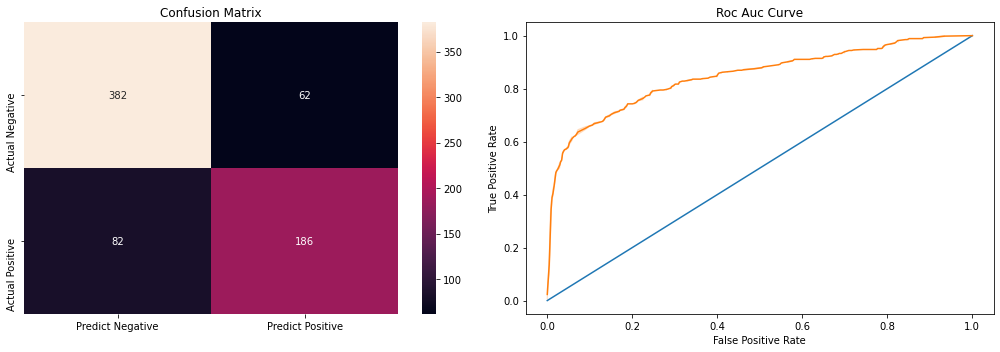

In [37]:
analyse(logreg, xtrain, ytrain, 'Training')


Model Report
Accuracy : 0.7978
AUC Score (Train): 0.847082


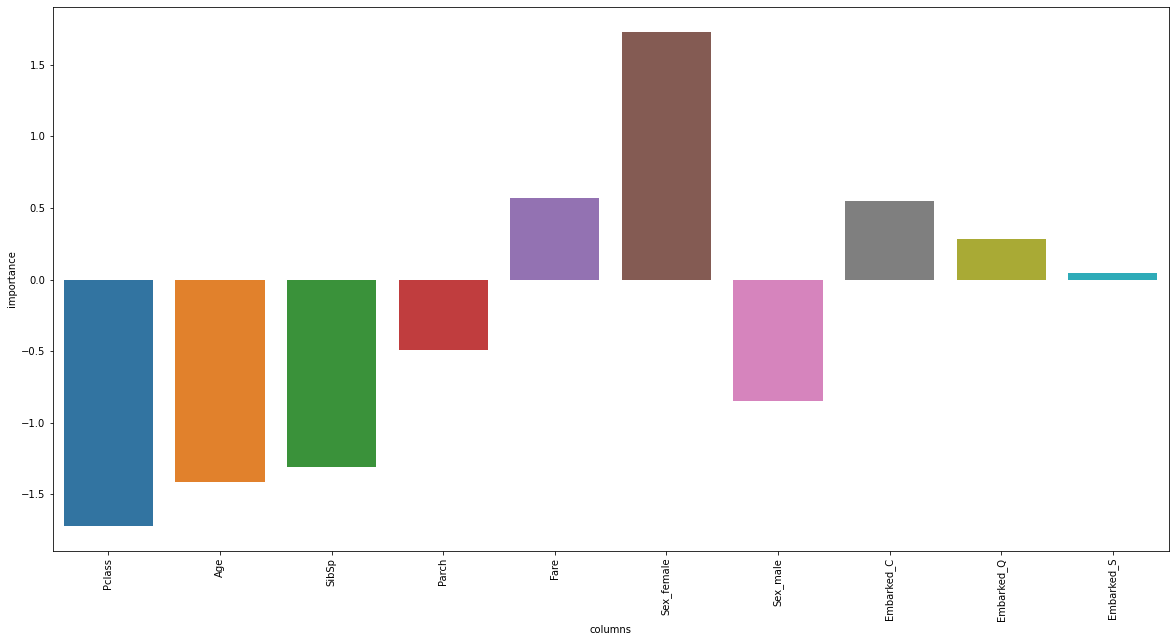

In [38]:
modelfit(logreg, xtrain, ytrain)

In [39]:
parameters = {'penalty' : ['l1','l2'],
              'C':[0.001, 0.01,0.1, 1, 10, 100, 1000]
             }
logreg = bestvalues(logreg, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8425


Parameters that give the best results : 

 {'C': 1000, 'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1000, random_state=42, solver='liblinear')


In [40]:
# fine Tuning C
parameters = {'C': range(1,100,2)}             
logreg = bestvalues(logreg, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8424


Parameters that give the best results : 

 {'C': 79}


Estimator that was chosen by the search : 

 LogisticRegression(C=79, random_state=42, solver='liblinear')


For Training data
Correct Predictions: 570
False Positives: 60
False Negatives: 82
Accuracy: 0.800561797752809
Precision: 0.7560975609756098
Sensitivity: 0.6940298507462687
Specificity: 0.8648648648648649
F1: 0.7237354085603113
ROC AUC score 0.8495529111200752


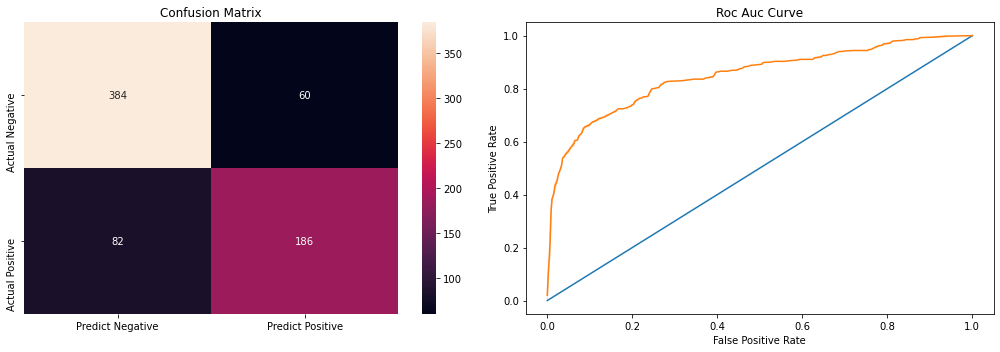

In [41]:
# Re analysing the model
analyse(logreg, xtrain, ytrain, 'Training') # model has slight improvement

For Test data
Correct Predictions: 145
False Positives: 15
False Negatives: 19
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Sensitivity: 0.7432432432432432
Specificity: 0.8571428571428571
F1: 0.7638888888888888
ROC AUC score 0.8818532818532818


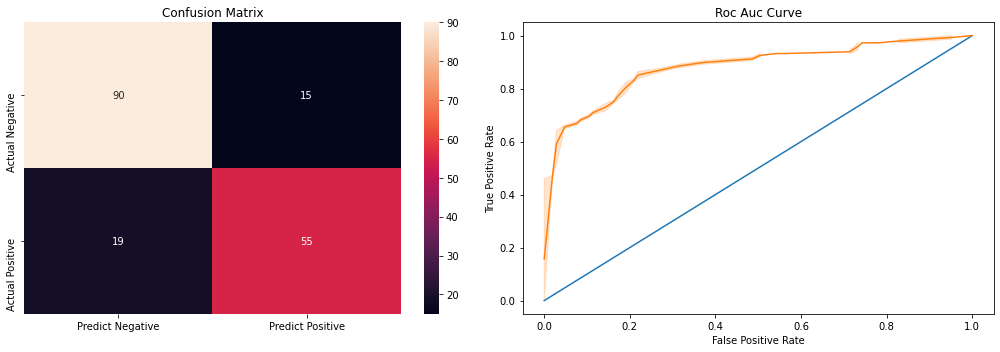

In [42]:
# Analysing the model on test data
analyse(logreg, xtest, ytest, 'Test')

Test data has all the prediction analysis terms close to that of Training data and F1 score, ROC Auc Score and accuracy is higher as compared to Training data.  So Logistic Regression model is quite good.

In [43]:
#Lets try using Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 4) #Leaving all other parameters at default
decision_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

For Training data
Correct Predictions: 598
False Positives: 15
False Negatives: 99
Accuracy: 0.8398876404494382
Precision: 0.9184782608695652
Sensitivity: 0.6305970149253731
Specificity: 0.9662162162162162
F1: 0.7477876106194691
ROC AUC score 0.881403791851553


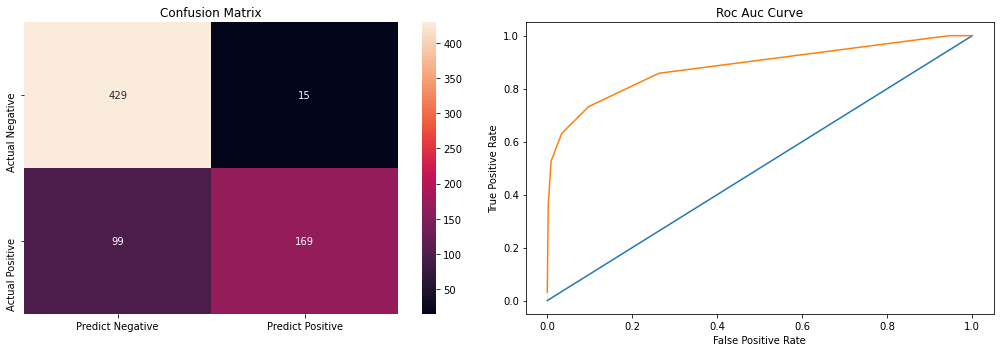

In [44]:
# model analysis
analyse(decision_tree, xtrain, ytrain, 'Training')


Model Report
Accuracy : 0.8399
AUC Score (Train): 0.881404


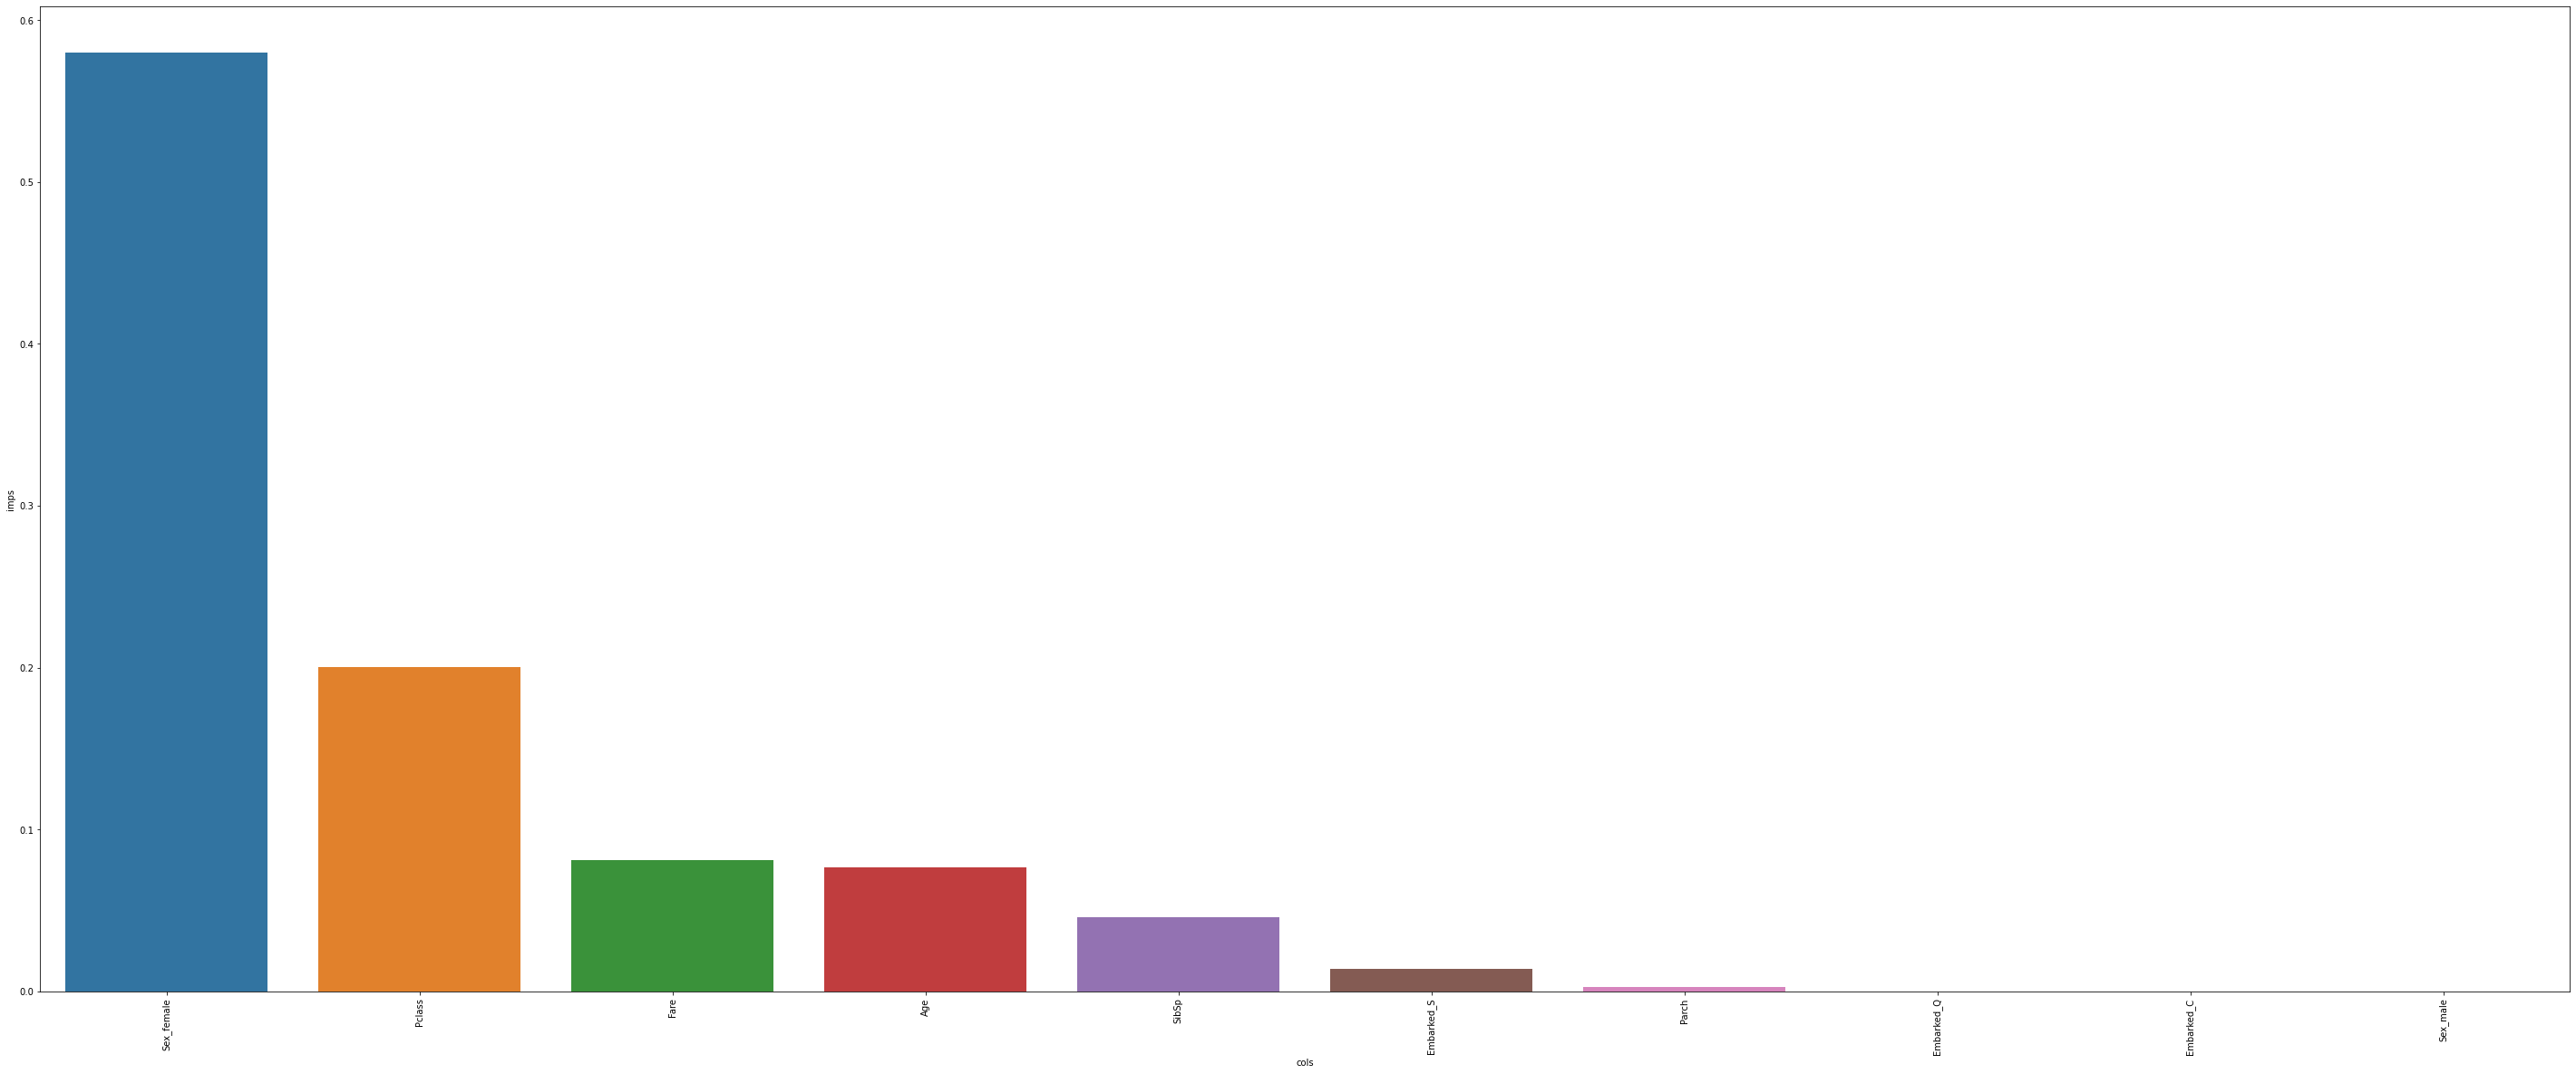

In [45]:
# getting important features
modelfit(decision_tree, xtrain, ytrain)

In [46]:
# hyperparameter tuning
parameters = {'criterion' :['gini', 'entropy'],
              'max_depth' : range(3,10)
             }
decision_tree = bestvalues(decision_tree, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8499


Parameters that give the best results : 

 {'criterion': 'entropy', 'max_depth': 3}


Estimator that was chosen by the search : 

 DecisionTreeClassifier(criterion='entropy', max_depth=3)


For Training data
Correct Predictions: 594
False Positives: 43
False Negatives: 75
Accuracy: 0.8342696629213483
Precision: 0.8177966101694916
Sensitivity: 0.7201492537313433
Specificity: 0.9031531531531531
F1: 0.7658730158730158
ROC AUC score 0.868751680785263


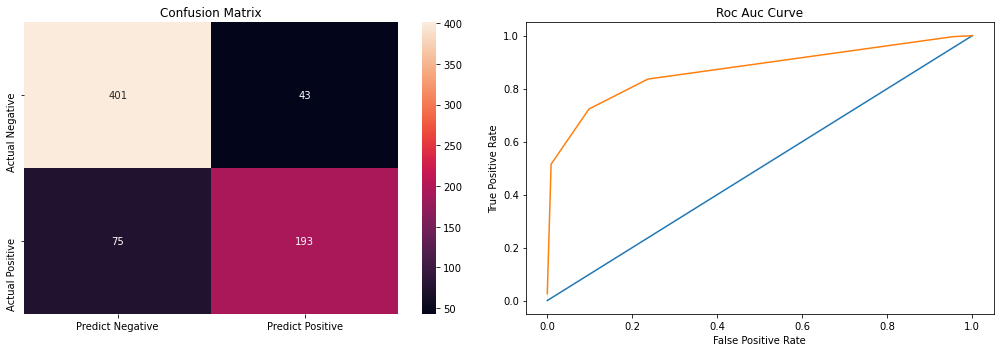

In [47]:
# model analysis
analyse(decision_tree, xtrain, ytrain, 'Training')

In [48]:
#since hyperparameter tuning is causing negative effect, we will use our previous model
decision_tree = DecisionTreeClassifier(max_depth = 4) #Leaving all other parameters at default
decision_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

For Test data
Correct Predictions: 143
False Positives: 9
False Negatives: 27
Accuracy: 0.7988826815642458
Precision: 0.8392857142857143
Sensitivity: 0.6351351351351351
Specificity: 0.9142857142857143
F1: 0.723076923076923
ROC AUC score 0.8487129987129987


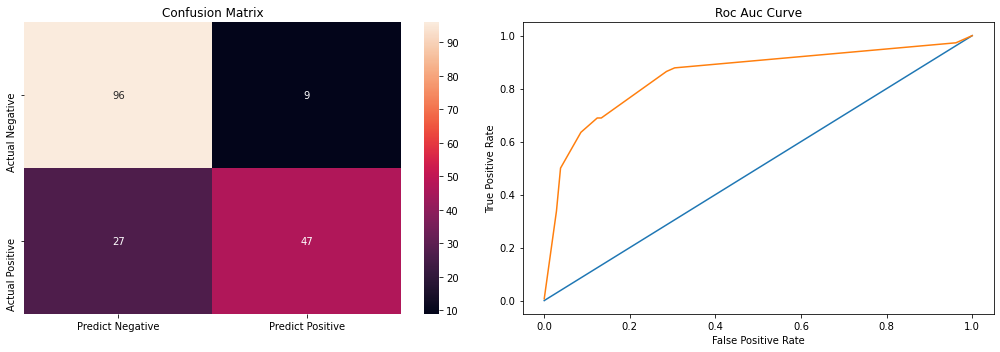

In [49]:
# model analysis test data
analyse(decision_tree, xtest, ytest, 'Test')

So accuracy of predictions for test data is lower than that of trainnig data. Model is considerably good as test results are within 5 percent of training results.

In [50]:
# Creating random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=50, max_depth = 4) #Leaving all other parameters at default
rforest.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=4, n_estimators=50)

For Training data
Correct Predictions: 598
False Positives: 34
False Negatives: 80
Accuracy: 0.8398876404494382
Precision: 0.8468468468468469
Sensitivity: 0.7014925373134329
Specificity: 0.9234234234234234
F1: 0.7673469387755102
ROC AUC score 0.8810214132042491


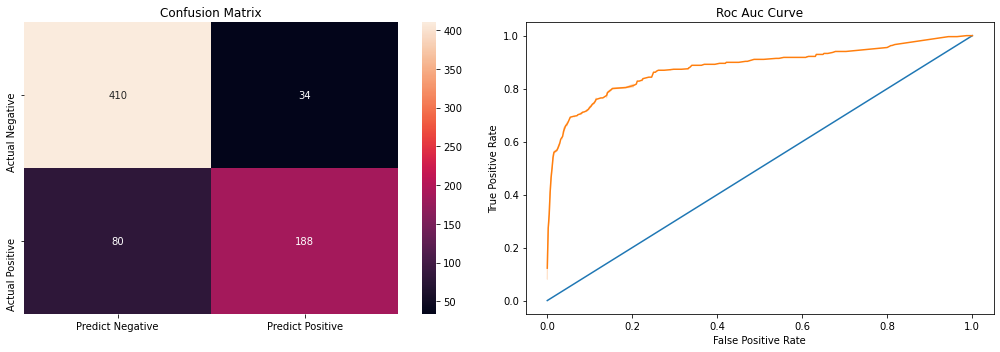

In [51]:
analyse(rforest, xtrain, ytrain, 'Training')

In [52]:
# trying randomforest without bootstrab and using oobsamples

In [53]:
parameters = {'bootstrap' : [True, False],
             'oob_score' : [False, True]}
rforest = bestvalues(rforest, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8559


Parameters that give the best results : 

 {'bootstrap': False, 'oob_score': False}


Estimator that was chosen by the search : 

 RandomForestClassifier(bootstrap=False, max_depth=4, n_estimators=50)


In [54]:
# hyperparameter tuning
parameters = {'criterion' :['gini', 'entropy'],
              'max_depth' : range(3,10)
             }
rforest = bestvalues(rforest, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8568


Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 5}


Estimator that was chosen by the search : 

 RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=50)


In [55]:
parameters = {'n_estimators' :range(10,1000,50)}
rforest = bestvalues(rforest, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8558


Parameters that give the best results : 

 {'n_estimators': 10}


Estimator that was chosen by the search : 

 RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=10)


For Training data
Correct Predictions: 614
False Positives: 25
False Negatives: 73
Accuracy: 0.8623595505617978
Precision: 0.8863636363636364
Sensitivity: 0.7276119402985075
Specificity: 0.9436936936936937
F1: 0.7991803278688525
ROC AUC score 0.9075946282103


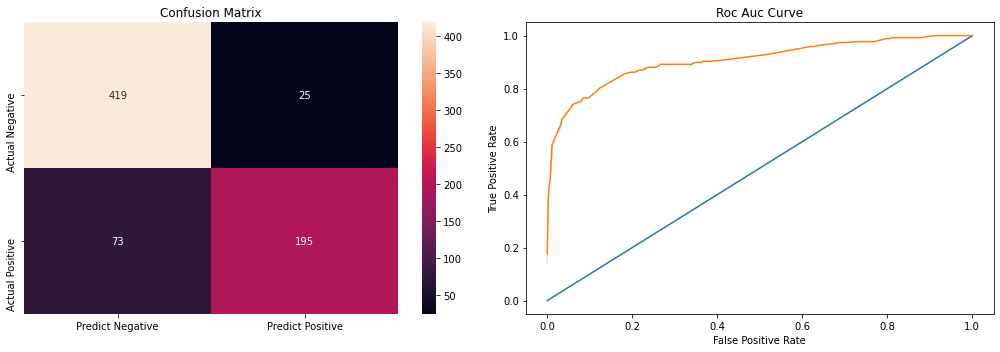

In [56]:
analyse(rforest, xtrain, ytrain, 'Training')


Model Report
Accuracy : 0.861
AUC Score (Train): 0.912881


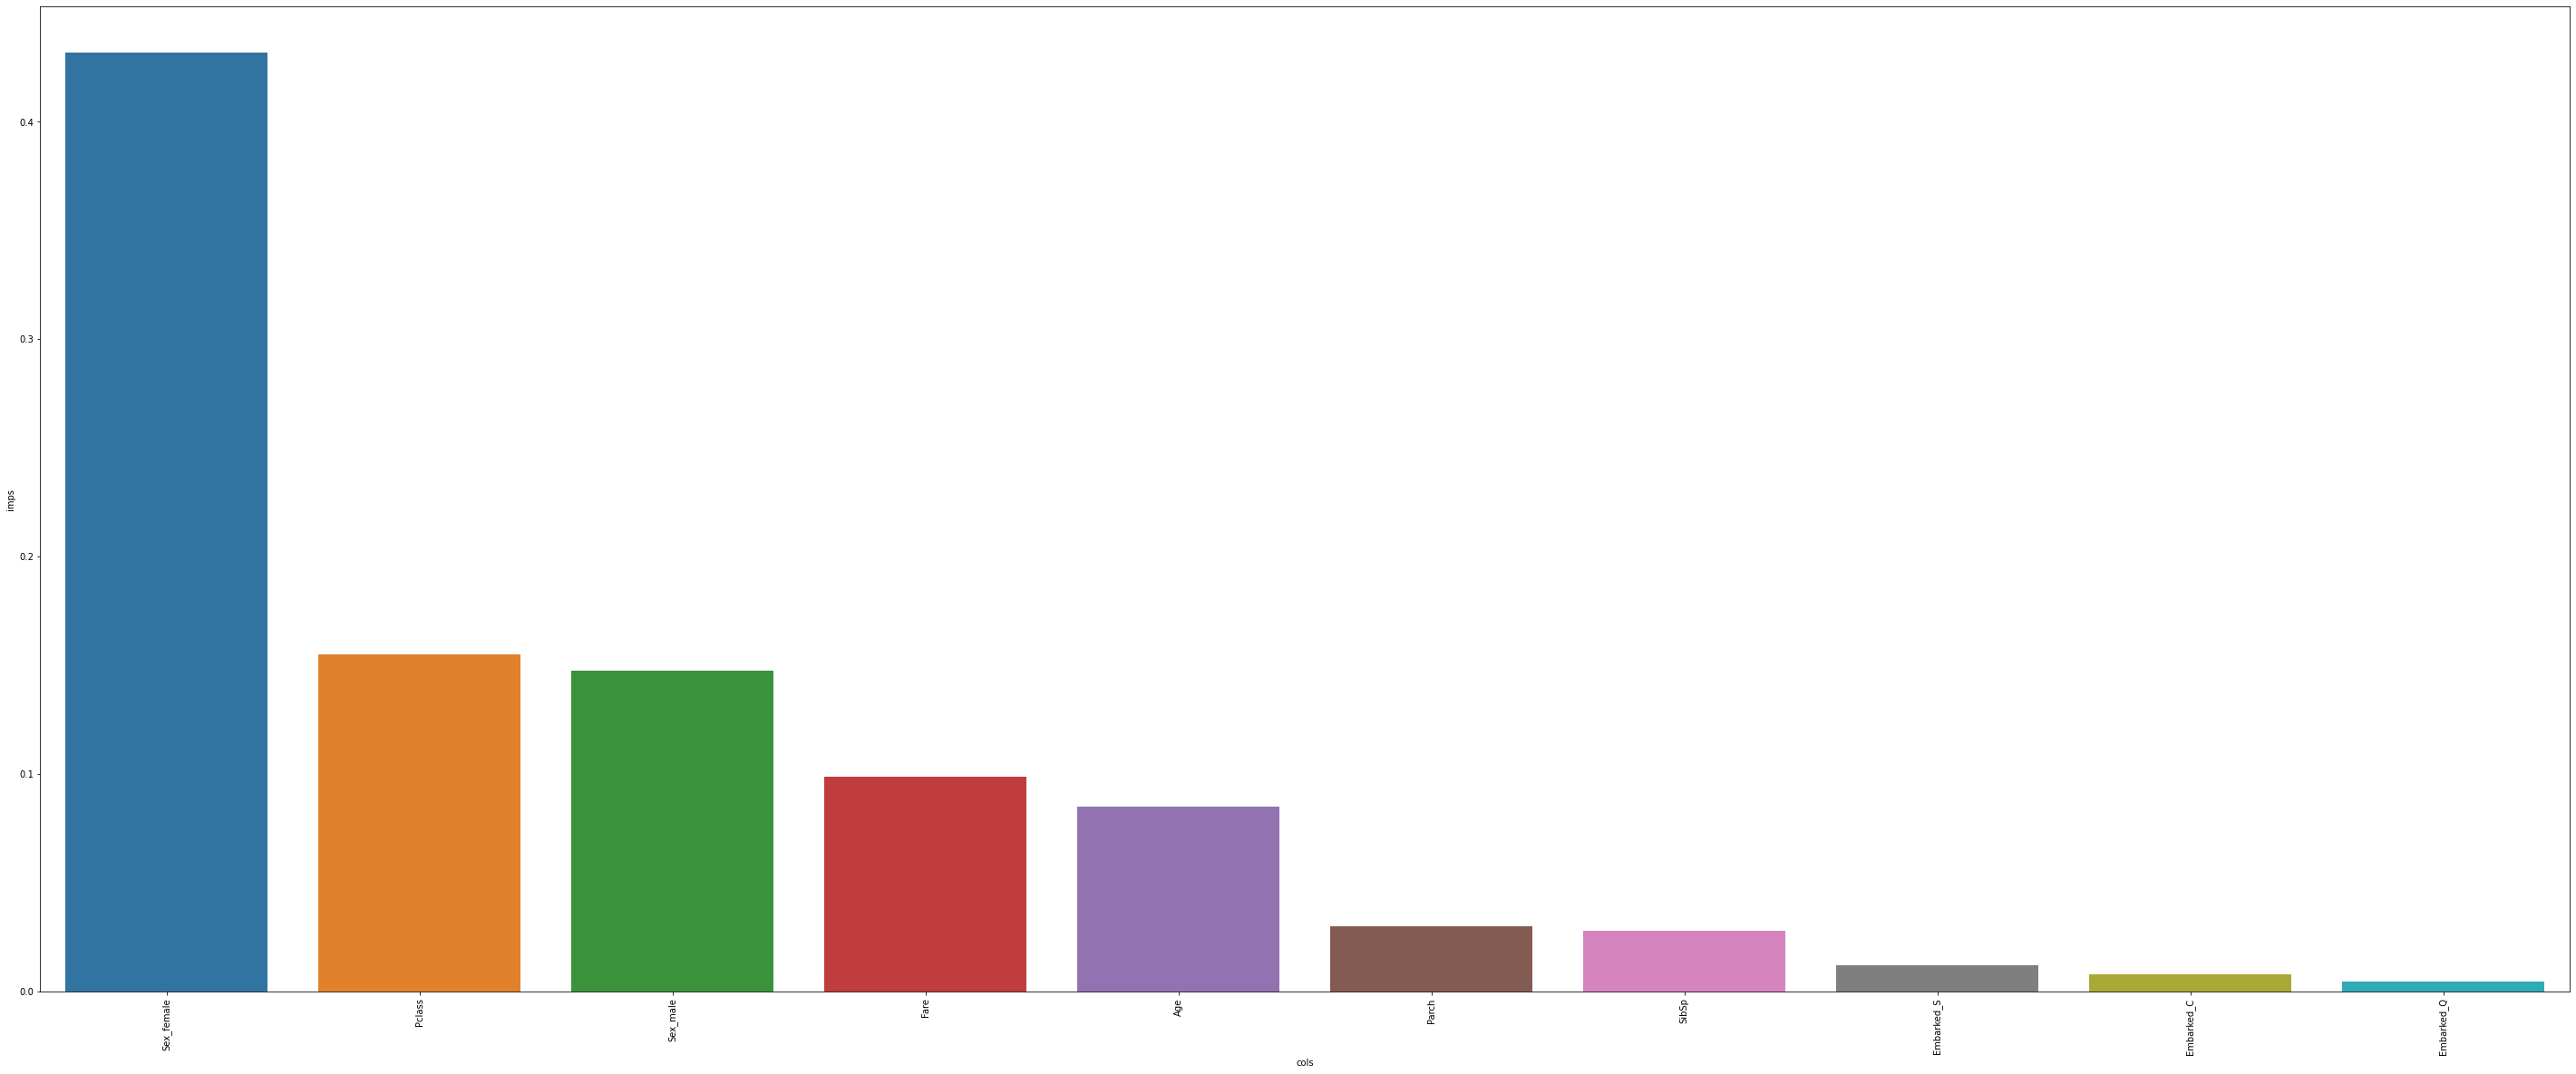

In [57]:
# getting important features
modelfit(rforest, xtrain, ytrain)

For Test data
Correct Predictions: 144
False Positives: 13
False Negatives: 22
Accuracy: 0.8044692737430168
Precision: 0.8
Sensitivity: 0.7027027027027027
Specificity: 0.8761904761904762
F1: 0.7482014388489208
ROC AUC score 0.8933075933075934


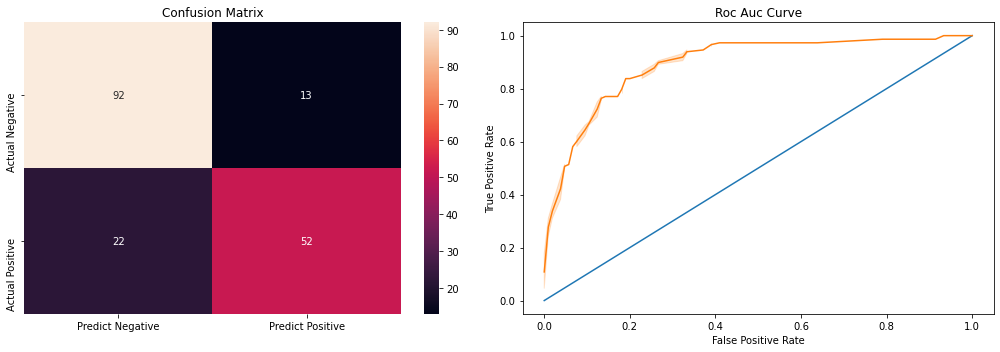

In [58]:
# analysing on test data
analyse(rforest, xtest, ytest, 'Test')

In [59]:
rforest = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9,
                       n_estimators=50)
rforest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9,
                       n_estimators=50)

For Test data
Correct Predictions: 149
False Positives: 9
False Negatives: 21
Accuracy: 0.8324022346368715
Precision: 0.8548387096774194
Sensitivity: 0.7162162162162162
Specificity: 0.9142857142857143
F1: 0.7794117647058824
ROC AUC score 0.8940797940797941


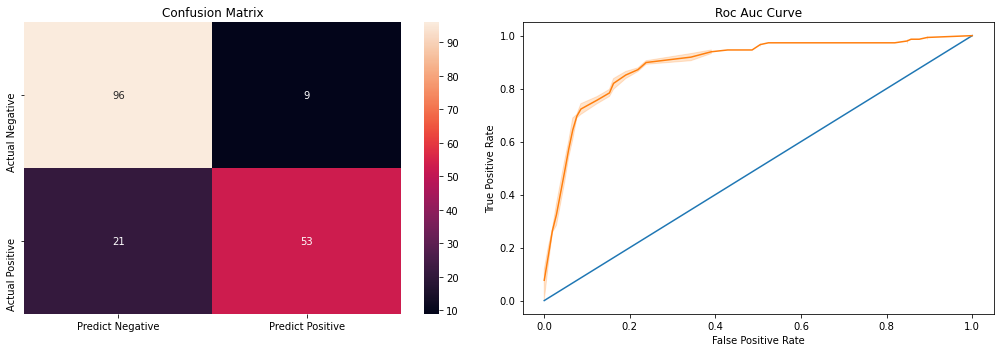

In [60]:
analyse(rforest, xtest, ytest, 'Test')

Despite good results in test data there is some overfitting that cant be resolved by altering the parameters, yet the model is preety good.

In [61]:
#Trying XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':1000,
            "eval_metric"      : ['logloss']
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

For training data
Correct Predictions: 591
False Positives: 27
False Negatives: 94
Accuracy: 0.8300561797752809
Precision: 0.8656716417910447
Sensitivity: 0.6492537313432836
Specificity: 0.9391891891891891
F1: 0.7420042643923241
ROC AUC score 0.8659951929541482


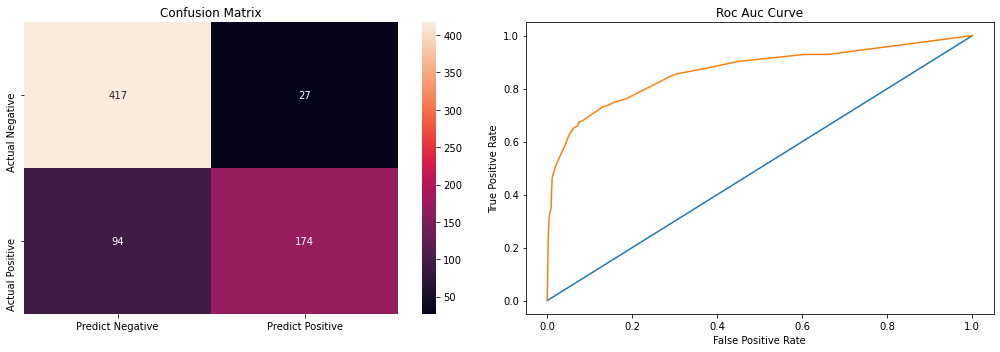

In [62]:
analyse(xgb_clf, xtrain, ytrain, 'training')

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.832095       0.004611       0.820755      0.036831
1        0.851726       0.004578       0.839749      0.037880
2        0.864977       0.005436       0.847834      0.038551
3        0.867987       0.006598       0.848668      0.035818

Model Report
Accuracy : 0.8301
AUC Score (Train): 0.864718


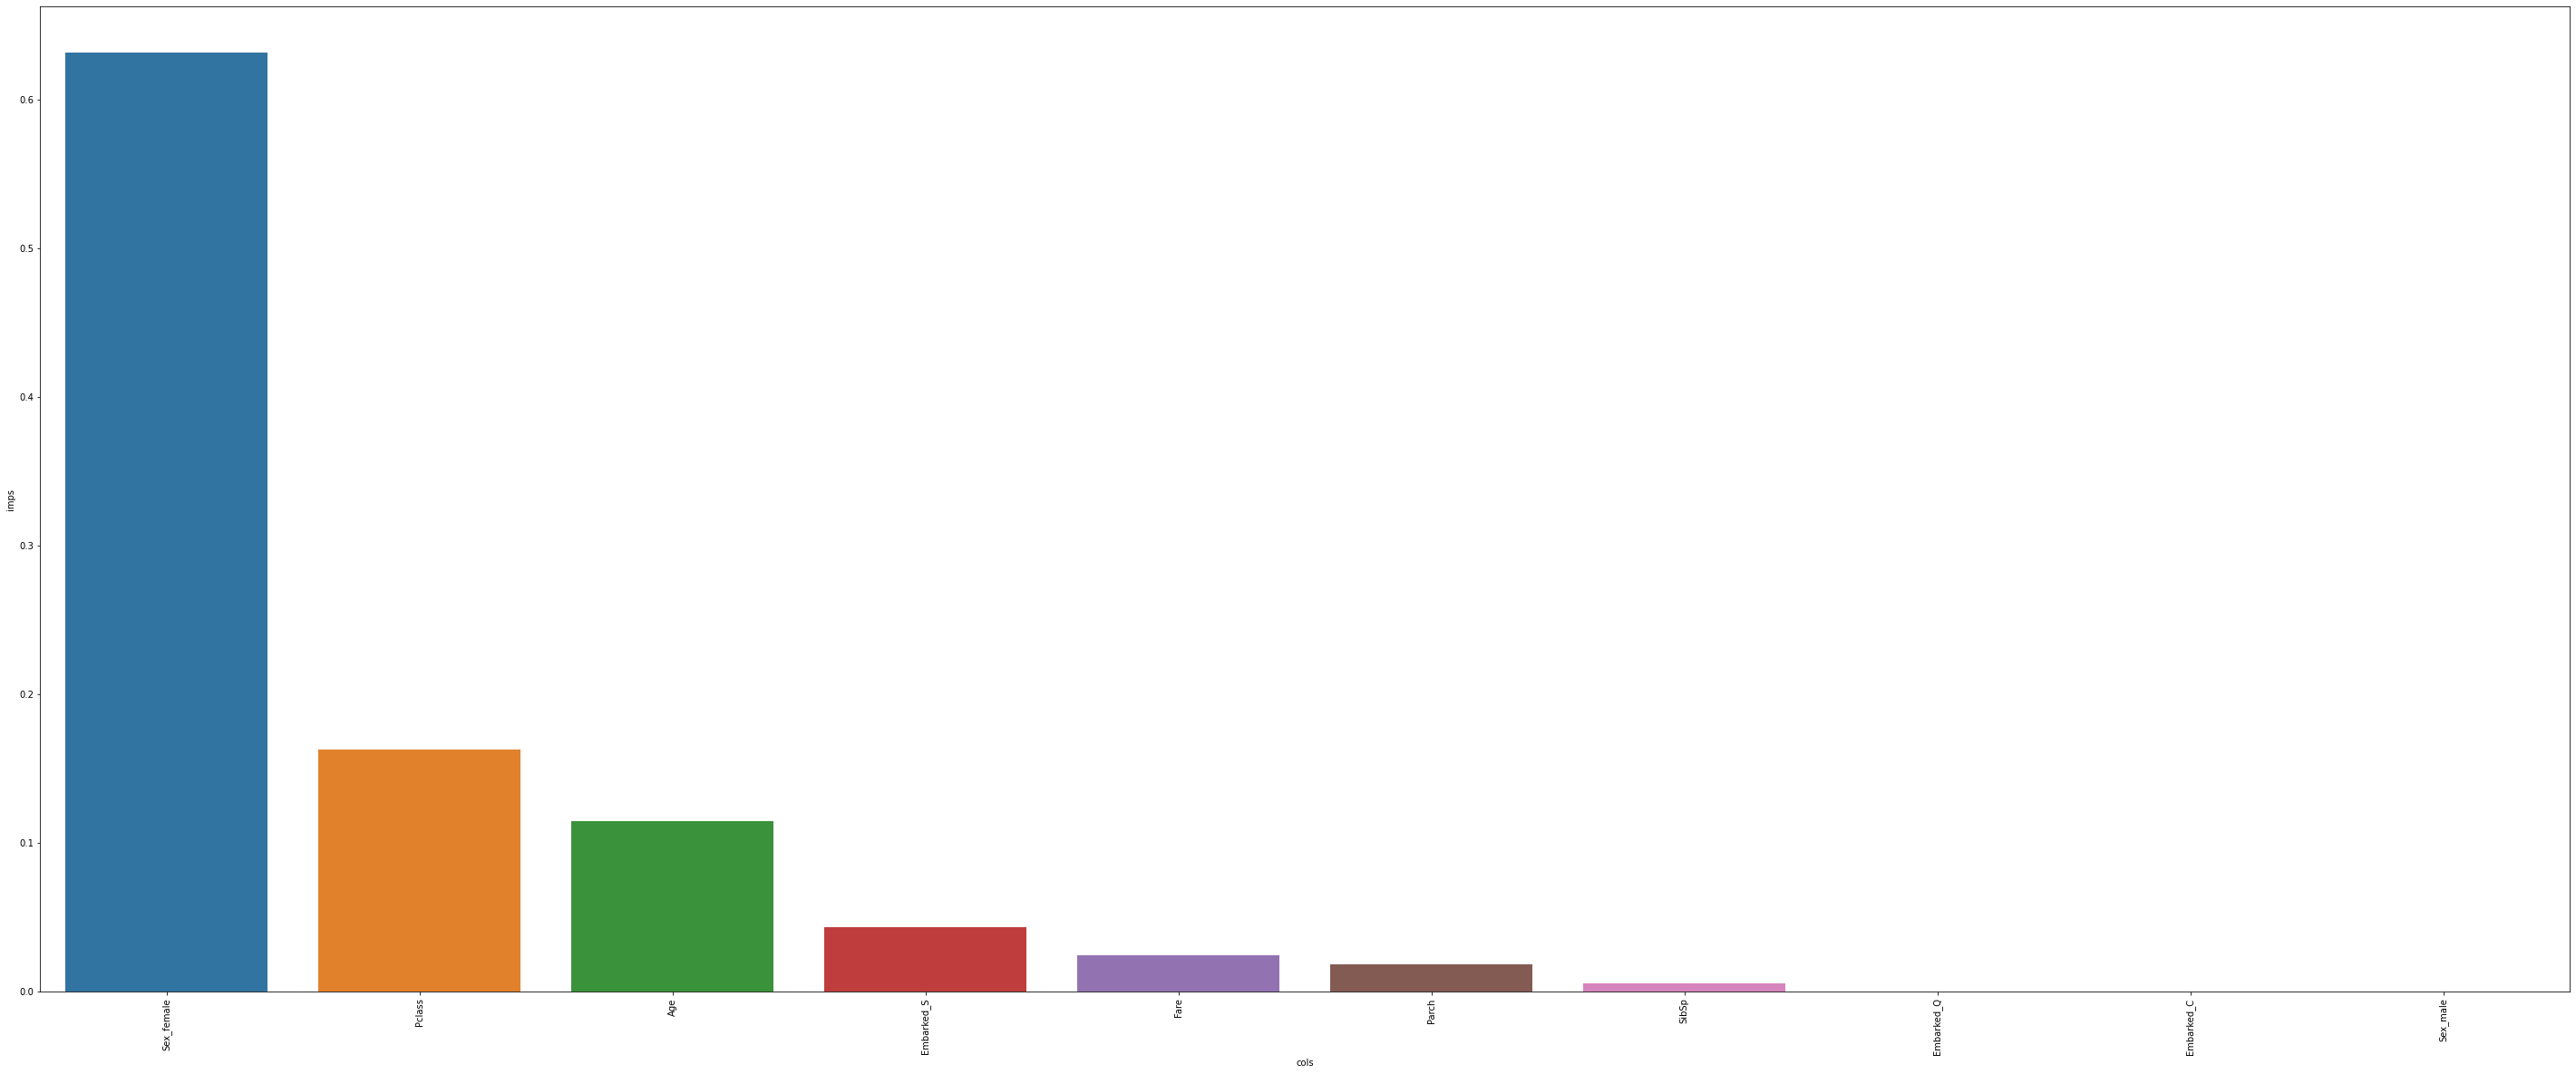

In [63]:
modelfit(xgb_clf, xtrain, ytrain)

In [64]:
# hyperparameter tuning in xgboost model
parameters = {'learning_rate':[x/100 for x in range(1,1000,20)]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8482


Parameters that give the best results : 

 {'learning_rate': 2.01}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=2.01, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [65]:
parameters = {'learning_rate':[x/10 for x in range(1,100,5)]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8435


Parameters that give the best results : 

 {'learning_rate': 0.6}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [66]:
parameters = {'max_depth': range(1,10),
             "min_child_weight": range(1,10)
             }
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8478


Parameters that give the best results : 

 {'max_depth': 4, 'min_child_weight': 4}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [67]:
parameters = {'gamma':[i/10.0 for i in range(0,10)]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8490


Parameters that give the best results : 

 {'gamma': 0.5}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [68]:
parameters = {'gamma':[i/100.0 for i in range(40,60)]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8490


Parameters that give the best results : 

 {'gamma': 0.48}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0.48, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [69]:
parameters = {'reg_alpha':[0.001,0.01,0.1,1, 10,100,1000],
             'reg_lambda':[0.001,0.01,0.1,1, 10,100,1000]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8593


Parameters that give the best results : 

 {'reg_alpha': 1, 'reg_lambda': 1}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric=['logloss'],
              gamma=0.48, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [70]:
parameters = {'subsample':[i/10.0 for i in range(1,10)],
             'colsample_bytree':[i/10.0 for i in range(1,10)]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8498


Parameters that give the best results : 

 {'colsample_bytree': 0.8, 'subsample': 0.7}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric=['logloss'],
              gamma=0.48, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)


In [71]:
parameters = {'subsample':[i/100.0 for i in range(60,80)],
             'colsample_bytree':[i/100.0 for i in range(70,90)]}
xgb_clf = bestvalues(xgb_clf, xtrain, ytrain, parameters)

GridSearch CV best score : 0.8516


Parameters that give the best results : 

 {'colsample_bytree': 0.7, 'subsample': 0.71}


Estimator that was chosen by the search : 

 XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric=['logloss'],
              gamma=0.48, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=4, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=1, subsample=0.71, tree_method='exact',
              validate_parameters=1, verbosity=None)


For Training data
Correct Predictions: 582
False Positives: 30
False Negatives: 100
Accuracy: 0.8174157303370787
Precision: 0.8484848484848485
Sensitivity: 0.6268656716417911
Specificity: 0.9324324324324325
F1: 0.7210300429184548
ROC AUC score 0.8704702837165524


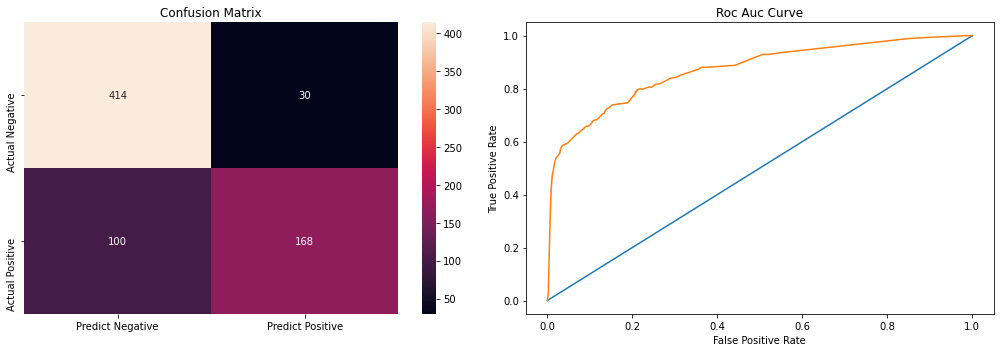

In [72]:
analyse(xgb_clf, xtrain, ytrain, 'Training')

For Training data
Correct Predictions: 612
False Positives: 21
False Negatives: 79
Accuracy: 0.8595505617977528
Precision: 0.9
Sensitivity: 0.7052238805970149
Specificity: 0.9527027027027027
F1: 0.7907949790794979
ROC AUC score 0.9105275984940164


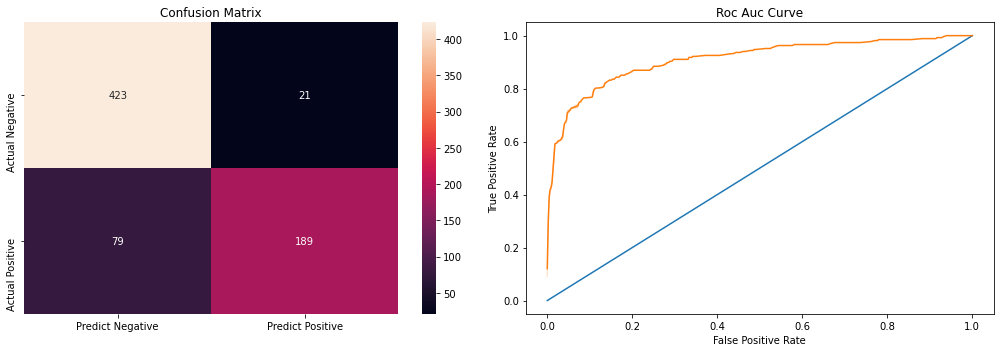

In [73]:
# decreasing learning rate to 0.01 and increasing max depth
xgb_clf = XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric=['logloss'],
              gamma=0.48, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=12, min_child_weight=4,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=1, subsample=0.71, tree_method='exact',
              validate_parameters=1, verbosity=None)
xgb_clf.fit(xtrain, ytrain)
analyse(xgb_clf, xtrain, ytrain, 'Training')

For test data
Correct Predictions: 145
False Positives: 11
False Negatives: 23
Accuracy: 0.8100558659217877
Precision: 0.8225806451612904
Sensitivity: 0.6891891891891891
Specificity: 0.8952380952380953
F1: 0.75
ROC AUC score 0.8796010296010295


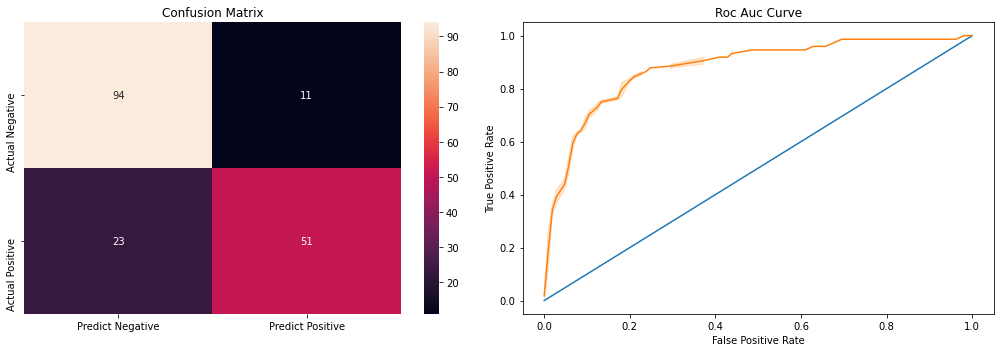

In [74]:
analyse(xgb_clf, xtest, ytest, 'test')

So far Random Forest is the best model according to our analysis, it has given Highest accuracy and ROC for traing data and despite little overfitting it has good accuracy and roc scoreds for test data as well.

Logistic regression was our baseline model which preformed better than Decision tree and test scores were better than XGBoost as well.

XGBoost is considerable as there is low overfitting but accuracy and ROC scores are less. Hyperparameter tuning didn't help either. After manually changing max_depth, learning rate and n_estimators in tuned model, considerable scores were obtained.

So in Conclusion, as far as supervised learning is concerned Random Forest Classifier should be preferred for the given dataset followed by XGBClassifier and simple logistic regression if Overfitting is a concern. 

In [75]:
# Trying Unsupervised Machine learning  
# KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)  # default kmeans++
kmeans.fit(xtrain)

KMeans(n_clusters=2, random_state=0)

In [76]:
kmeans.inertia_ # here we have a high inertia where low inertia is preferred. 

464.8445547439147

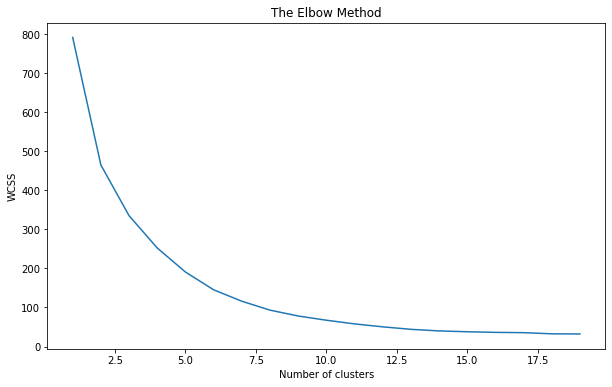

In [77]:
# using Elbow method to find appropriate number of clusters.
cs = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(xtrain)
    cs.append(kmeans.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1, 20), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
from sklearn.metrics import silhouette_score
range_n_clusters = [5, 6, 7, 8, 9, 10, 11]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(xtrain)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(xtrain, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=5, the silhouette score is 0.6056994588565994
For n_clusters=6, the silhouette score is 0.5626611761774555
For n_clusters=7, the silhouette score is 0.5945995104829284
For n_clusters=8, the silhouette score is 0.5697522260424625
For n_clusters=9, the silhouette score is 0.5779614633996776
For n_clusters=10, the silhouette score is 0.5821939828167053
For n_clusters=11, the silhouette score is 0.574461751206364


In [79]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(xtrain)

KMeans(n_clusters=5, random_state=0)

In [80]:
kmeans.inertia_ # the inertia is still quite high

190.7843062130121

In [81]:
df_train['clusters'] = kmeans.predict(xtrain)
df_test['clusters'] = kmeans.predict(xtest)

<AxesSubplot:xlabel='clusters', ylabel='Survived'>

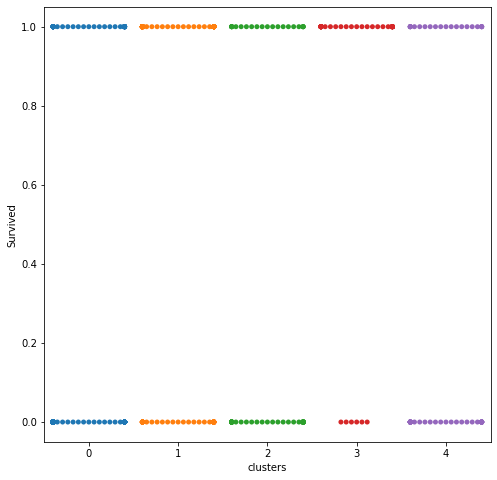

In [82]:
plt.figure(figsize=(8,8))
sns.swarmplot(df_train.clusters, df_train.Survived)

<AxesSubplot:xlabel='clusters', ylabel='Survived'>

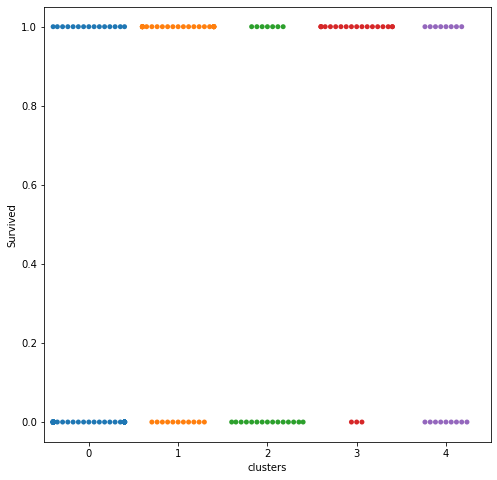

In [83]:
plt.figure(figsize=(8,8))
sns.swarmplot(df_test.clusters, df_test.Survived)

So, there is no clear distinction among clusters that could predict binary attribute survival. Hence KMeans clustering is not appropriate for the task at all.

In [84]:
# Now using test.csv to make predictions on unknown data
titanic_test = pd.read_csv("test.csv")

In [85]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
# getting null values
ls = [] 
for i in titanic_test.columns:
    if titanic_test[i].isnull().sum() > 0:
        ls.append([i, titanic_test[i].isnull().sum()])
print(ls)

[['Age', 86], ['Fare', 1], ['Cabin', 327]]


In [87]:
# getting Percentage Null values and their datatype
for i in ls:
    nullpercent = i[1]/titanic_test.shape[0]
    nullpercent = round(nullpercent,6)
    dt = type(titanic_test[i[0]][1])
    print(f'Null percentage in {i[0]} is {nullpercent * 100} % and datatype {dt}')

Null percentage in Age is 20.5742 % and datatype <class 'numpy.float64'>
Null percentage in Fare is 0.2392 % and datatype <class 'numpy.float64'>
Null percentage in Cabin is 78.22970000000001 % and datatype <class 'float'>


In [88]:
d = ['PassengerId','Ticket','Cabin','Name']
titanic_test.drop(d, axis = 1, inplace = True)

In [89]:
titanic_test.Fare.fillna(titanic_test.Fare.median(), inplace = True)
titanic_test.Age.fillna(titanic_test.Age.median(), inplace = True)

In [90]:
ls = [] 
for i in titanic_test.columns:
    if titanic_test[i].isnull().sum() > 0:
        ls.append([i, titanic_test[i].isnull().sum()])
print(ls)

[]


In [91]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [92]:
final_titanic_test = pd.get_dummies(titanic_test, drop_first = False)

In [93]:
cols = list(final_titanic_test.columns)
final_titanic_test[cols] = scaler.fit_transform(final_titanic_test[cols])
final_titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,1.0,0.0
1,1.0,0.617566,0.125,0.000000,0.013663,1.0,0.0,0.0,0.0,1.0
2,0.5,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,1.0,0.0
3,1.0,0.353818,0.000,0.000000,0.016908,0.0,1.0,0.0,0.0,1.0
4,1.0,0.287881,0.125,0.111111,0.023984,1.0,0.0,0.0,0.0,1.0


In [94]:
# using XGBoost, Logistic regression and Random Forest to predict results
pred_logreg = logreg.predict(final_titanic_test)
pred_rforest = rforest.predict(final_titanic_test)
pred_xgb = xgb_clf.predict(final_titanic_test)

In [95]:
predictions = pd.DataFrame({'logreg': pred_logreg,
                            'random_forest': pred_rforest,
                            'XGBoost': pred_xgb
                           })
predictions.head()

,logreg,random_forest,XGBoost
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,1.0,0.0


In [96]:
print(f'Similarity between Logistic regression and Random Forest is {accuracy_score(predictions.logreg,predictions.random_forest) * 100} %')
print(f'Similarity between Logistic regression and XGBoost is {accuracy_score(predictions.logreg,predictions.XGBoost) * 100} %')
print(f'Similarity between XGBoost and Random Forest is {accuracy_score(predictions.XGBoost,predictions.random_forest) * 100} %')

Similarity between Logistic regression and Random Forest is 88.03827751196172 %
Similarity between Logistic regression and XGBoost is 91.14832535885168 %
Similarity between XGBoost and Random Forest is 92.58373205741627 %
